<a href="https://colab.research.google.com/github/rocklimon/CVPR/blob/main/MID/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Implementation of a Three Hidden Layer Neural Network for Multi-Class Classification**

 **Name: MD Limon Sheikh**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      **ID: 22-49331-3**   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Sec: C**


Generating and splitting dataset...
Training samples: 1600
Testing samples: 400


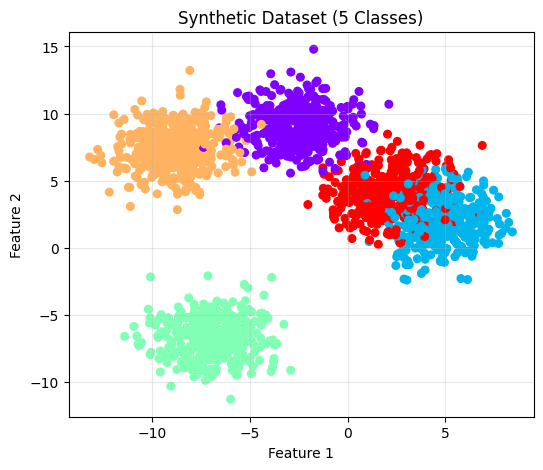

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

np.random.seed(42)


print("Generating and splitting dataset...")

n_samples = 2000
n_features = 2
n_classes = 5

x, y_labels = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_classes,
    cluster_std=1.5,
    random_state=42
)


y = np.zeros((len(y_labels), n_classes))
for i in range(len(y_labels)):
    y[i, y_labels[i]] = 1

x_train, x_test, y_train, y_test, y_train_labels, y_test_labels = train_test_split(
    x, y, y_labels,
    test_size=0.2,
    random_state=42,
    stratify=y_labels
)

print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples: {x_test.shape[0]}")

plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=y_labels, cmap="rainbow", s=30)
plt.title("Synthetic Dataset (5 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.show()



Training the neural network...
Epoch 0 → Loss = 1.6135
Epoch 500 → Loss = 1.6092
Epoch 1000 → Loss = 1.6085
Epoch 1500 → Loss = 1.6058
Epoch 2000 → Loss = 1.5599
Epoch 2500 → Loss = 1.0260
Epoch 3000 → Loss = 0.7848
Epoch 3500 → Loss = 0.6278


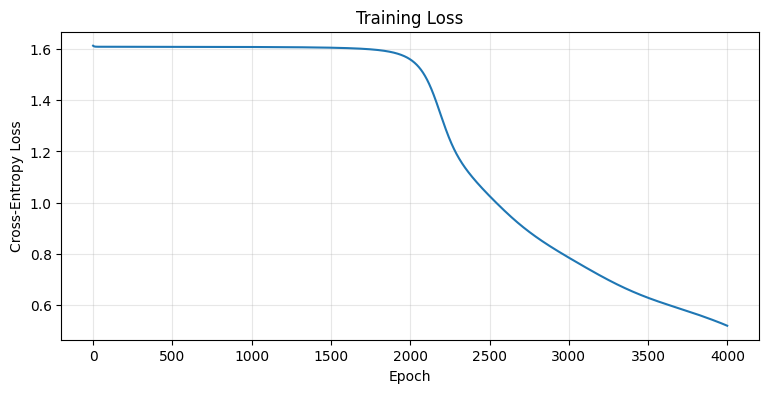


Test Accuracy: 0.9175


In [10]:

class NeuralNetwork:
    def __init__(self, input_size=2, h1=10, h2=15, h3=10, output_size=5, learning_rate=0.1):

        self.W_H1 = np.random.randn(input_size, h1) * 0.1
        self.W_H2 = np.random.randn(h1, h2) * 0.1
        self.W_H3 = np.random.randn(h2, h3) * 0.1
        self.W_O  = np.random.randn(h3, output_size) * 0.1

        self.b_H1 = np.zeros((1, h1))
        self.b_H2 = np.zeros((1, h2))
        self.b_H3 = np.zeros((1, h3))
        self.b_O  = np.zeros((1, output_size))

        self.lr = learning_rate

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def feedforward(self, x):
        self.h1_in = x @ self.W_H1 + self.b_H1
        self.h1_out = self.sigmoid(self.h1_in)

        self.h2_in = self.h1_out @ self.W_H2 + self.b_H2
        self.h2_out = self.sigmoid(self.h2_in)

        self.h3_in = self.h2_out @ self.W_H3 + self.b_H3
        self.h3_out = self.sigmoid(self.h3_in)

        self.out_in = self.h3_out @ self.W_O + self.b_O
        self.out = self.softmax(self.out_in)

        return self.out

    def backprop(self, x, y, pred):
        m = len(x)
        delta_out = (pred - y) / m

        dW_O = self.h3_out.T @ delta_out
        db_O = np.sum(delta_out, axis=0, keepdims=True)

        delta3 = (delta_out @ self.W_O.T) * self.sigmoid(self.h3_out, der=True)
        dW_H3 = self.h2_out.T @ delta3
        db_H3 = np.sum(delta3, axis=0, keepdims=True)

        delta2 = (delta3 @ self.W_H3.T) * self.sigmoid(self.h2_out, der=True)
        dW_H2 = self.h1_out.T @ delta2
        db_H2 = np.sum(delta2, axis=0, keepdims=True)

        delta1 = (delta2 @ self.W_H2.T) * self.sigmoid(self.h1_out, der=True)
        dW_H1 = x.T @ delta1
        db_H1 = np.sum(delta1, axis=0, keepdims=True)


        self.W_O -= self.lr * dW_O
        self.b_O -= self.lr * db_O
        self.W_H3 -= self.lr * dW_H3
        self.b_H3 -= self.lr * db_H3
        self.W_H2 -= self.lr * dW_H2
        self.b_H2 -= self.lr * db_H2
        self.W_H1 -= self.lr * dW_H1
        self.b_H1 -= self.lr * db_H1

    def compute_loss(self, y, pred):
        eps = 1e-8
        return -np.mean(np.sum(y * np.log(pred + eps), axis=1))

    def train(self, x, y, epochs=4000, print_every=500):
        self.errors = []
        for e in range(epochs):
            pred = self.feedforward(x)
            self.backprop(x, y, pred)
            loss = self.compute_loss(y, pred)
            self.errors.append(loss)

            if e % print_every == 0:
                print(f"Epoch {e} → Loss = {loss:.4f}")

    def predict(self, x):
        return np.argmax(self.feedforward(x), axis=1)


print("Training the neural network...")
NN = NeuralNetwork()
NN.train(x_train, y_train, epochs=4000, print_every=500)


plt.figure(figsize=(9, 4))
plt.plot(NN.errors)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(alpha=0.3)
plt.show()


y_pred = NN.predict(x_test)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")



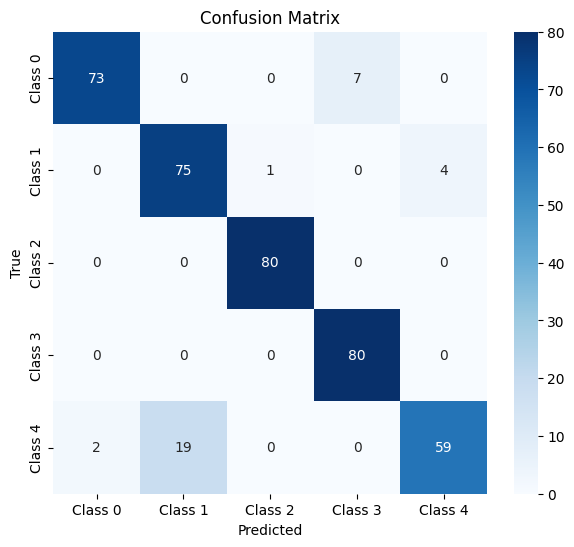


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        80
           1       0.80      0.94      0.86        80
           2       0.99      1.00      0.99        80
           3       0.92      1.00      0.96        80
           4       0.94      0.74      0.83        80

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [11]:

conf = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"Class {i}" for i in range(n_classes)],
            yticklabels=[f"Class {i}" for i in range(n_classes)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



print("\nClassification Report:")
print(classification_report(y_true, y_pred))
